# Real Input

RMSE (FFT manual vs scipy):  2.3633e-16
RMSE (Conv manual vs scipy): 9.9373e-03


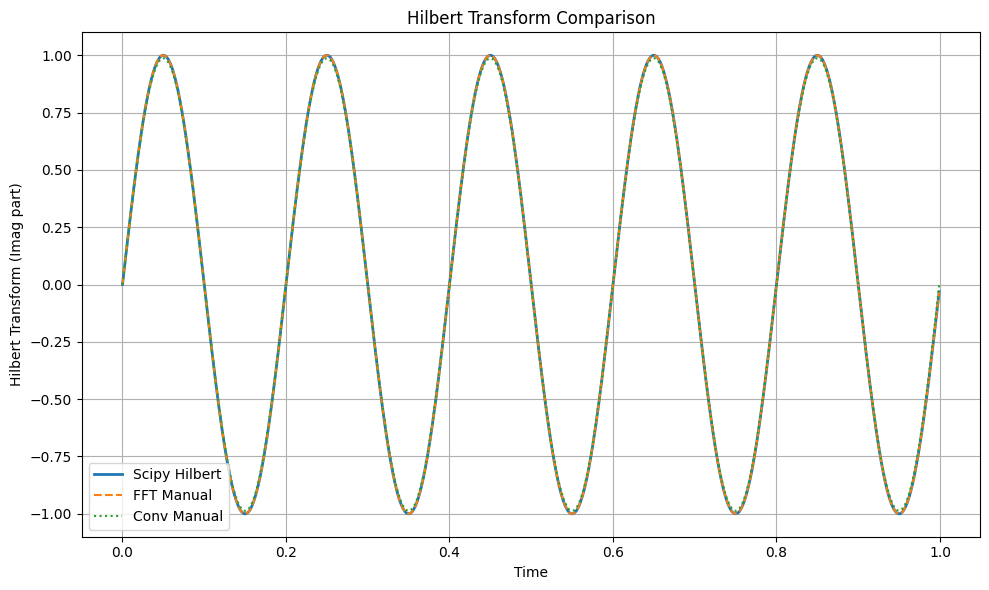

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert as hilbert_scipy

# -----------------------------------------------------------
# Hilbert Transform using FFT (manual implementation)
# -----------------------------------------------------------
def hilbert_manual_fft(x):
    N = len(x)
    X_f = np.fft.fft(x)

    # Create frequency-domain Hilbert filter
    H = np.zeros(N)
    if N % 2 == 0:
        H[0] = 1
        H[N//2] = 1
        H[1:N//2] = 2
    else:
        H[0] = 1
        H[1:(N+1)//2] = 2

    # Apply filter and inverse FFT
    X_f_filtered = X_f * H
    x_hilbert = np.fft.ifft(X_f_filtered)
    return x_hilbert

# -----------------------------------------------------------
# Hilbert Transform using time-domain convolution
# -----------------------------------------------------------
def hilbert_manual_conv(x, filter_len=120):
    # Ensure odd filter length
    if filter_len % 2 == 0:
        filter_len += 1

    # Generate the impulse response of Hilbert filter
    n = np.arange(-(filter_len//2), filter_len//2 + 1)
    h = np.zeros_like(n, dtype=np.float64)
    for i, ni in enumerate(n):
        if ni == 0 or ni % 2 == 0:
            h[i] = 0.0
        else:
            h[i] = 2 / (np.pi * ni)

    # Pad signal to avoid boundary effects
    x_padded = np.pad(x, (filter_len//2, filter_len//2), mode='reflect')
    x_hilbert = np.convolve(x_padded, h, mode='valid')
    return x_padded, h, x_hilbert

# -----------------------------------------------------------
# Generate test signal
# -----------------------------------------------------------
t = np.linspace(0, 1, 256, endpoint=False)
x = np.cos(2 * np.pi * 5 * t)

# Compute Hilbert transform with three methods
analytic_lib  = hilbert_scipy(x)
analytic_fft  = hilbert_manual_fft(x)
x_padded, h, hilbert_conv  = hilbert_manual_conv(x)

# -----------------------------------------------------------
# Compute RMSE for comparison
# -----------------------------------------------------------
rmse_fft = np.sqrt(np.mean((analytic_fft.imag - analytic_lib.imag) ** 2))
rmse_conv = np.sqrt(np.mean((hilbert_conv - analytic_lib.imag) ** 2))

print(f"RMSE (FFT manual vs scipy):  {rmse_fft:.4e}")
print(f"RMSE (Conv manual vs scipy): {rmse_conv:.4e}")

# -----------------------------------------------------------
# Plot the results
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(t, analytic_lib.imag, label='Scipy Hilbert', linewidth=2)
plt.plot(t, analytic_fft.imag, '--', label='FFT Manual')
plt.plot(t, hilbert_conv, ':', label='Conv Manual')
plt.legend()
plt.title("Hilbert Transform Comparison")
plt.xlabel("Time")
plt.ylabel("Hilbert Transform (Imag part)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Complex Input

RMSE (Conv manual vs scipy): 3.6258e-02


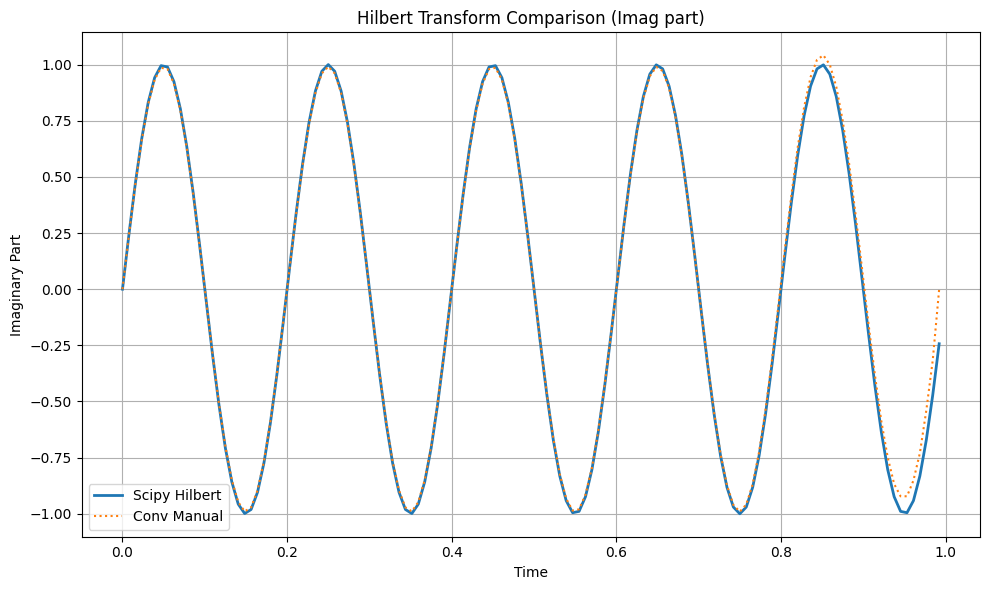

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert as hilbert_scipy

# -----------------------------------------------------------
# Hilbert Transform using time-domain convolution (real part only)
# -----------------------------------------------------------
def hilbert_manual_conv(x, filter_len=128):
    x = np.asarray(x)

    # Only apply to real part if complex input
    x_real = np.real(x)

    if filter_len % 2 == 0:
        filter_len += 1

    n = np.arange(-(filter_len // 2), filter_len // 2 + 1)
    h = np.zeros_like(n, dtype=np.float64)
    for i, ni in enumerate(n):
        if ni == 0 or ni % 2 == 0:
            h[i] = 0.0
        else:
            h[i] = 2 / (np.pi * ni)

    x_padded = np.pad(x_real, (filter_len // 2, filter_len // 2), mode='reflect')
    x_hilbert = np.convolve(x_padded, h, mode='valid')

    # Reconstruct analytic signal: real + j·hilbert
    z = x_real + 1j * x_hilbert
    return x_padded, h, z

# -----------------------------------------------------------
# Generate test signal (real and complex part)
# -----------------------------------------------------------
t = np.linspace(0, 1, 128, endpoint=False)
x_real = np.cos(2 * np.pi * 5 * t)
x_imag = 0.5 * np.sin(2 * np.pi * 10 * t)
x = x_real + 1j * x_imag  # Can also test with just real signal

# Apply scipy's hilbert only on real part
analytic_lib = hilbert_scipy(x_real)

# Apply manual convolution-based Hilbert transform
x_padded, h, analytic_conv = hilbert_manual_conv(x, filter_len=64)

# -----------------------------------------------------------
# Compute RMSE (imag part only)
# -----------------------------------------------------------
rmse_conv = np.sqrt(np.mean((analytic_conv.imag - analytic_lib.imag) ** 2))

print(f"RMSE (Conv manual vs scipy): {rmse_conv:.4e}")

# -----------------------------------------------------------
# Plot the results (imag part only)
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(t, analytic_lib.imag, label='Scipy Hilbert', linewidth=2)
plt.plot(t, analytic_conv.imag, ':', label='Conv Manual')
plt.legend()
plt.title("Hilbert Transform Comparison (Imag part)")
plt.xlabel("Time")
plt.ylabel("Imaginary Part")
plt.grid(True)
plt.tight_layout()
plt.show()
